In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
X=df.drop(columns=['Embarked','Cabin','Fare','Ticket','Parch','SibSp','PassengerId','Name','Survived'])
Y=df['Survived']

In [7]:
print(X)

     Pclass     Sex   Age
0         3    male  22.0
1         1  female  38.0
2         3  female  26.0
3         1  female  35.0
4         3    male  35.0
..      ...     ...   ...
886       2    male  27.0
887       1  female  19.0
888       3  female   NaN
889       1    male  26.0
890       3    male  32.0

[891 rows x 3 columns]


In [8]:
X = pd.get_dummies(X,dtype=int)
X

,Pclass,Age,Sex_female,Sex_male
0,3,22.0,0,1
1,1,38.0,1,0
2,3,26.0,1,0
3,1,35.0,1,0
4,3,35.0,0,1
...,...,...,...,...
886,2,27.0,0,1
887,1,19.0,1,0
888,3,NaN,1,0
889,1,26.0,0,1


In [9]:
print(X.corr())

              Pclass       Age  Sex_female  Sex_male
Pclass      1.000000 -0.369226   -0.131900  0.131900
Age        -0.369226  1.000000   -0.093254  0.093254
Sex_female -0.131900 -0.093254    1.000000 -1.000000
Sex_male    0.131900  0.093254   -1.000000  1.000000


In [10]:
print(X.isna().sum())

Pclass          0
Age           177
Sex_female      0
Sex_male        0
dtype: int64


In [11]:
from numpy import mean
print(mean(df['Age']))

29.69911764705882


In [12]:
X['Age'].fillna(mean(X['Age']),inplace=True)
print(X.to_string())

     Pclass        Age  Sex_female  Sex_male
0         3  22.000000           0         1
1         1  38.000000           1         0
2         3  26.000000           1         0
3         1  35.000000           1         0
4         3  35.000000           0         1
5         3  29.699118           0         1
6         1  54.000000           0         1
7         3   2.000000           0         1
8         3  27.000000           1         0
9         2  14.000000           1         0
10        3   4.000000           1         0
11        1  58.000000           1         0
12        3  20.000000           0         1
13        3  39.000000           0         1
14        3  14.000000           1         0
15        2  55.000000           1         0
16        3   2.000000           0         1
17        2  29.699118           0         1
18        3  31.000000           1         0
19        3  29.699118           1         0
20        2  35.000000           0         1
21        

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [15]:
ans = model.predict([[1,28,1,1]])
print(ans)

[1]


In [16]:
model.score(X,Y)

0.8013468013468014

<Axes: xlabel='Pclass'>

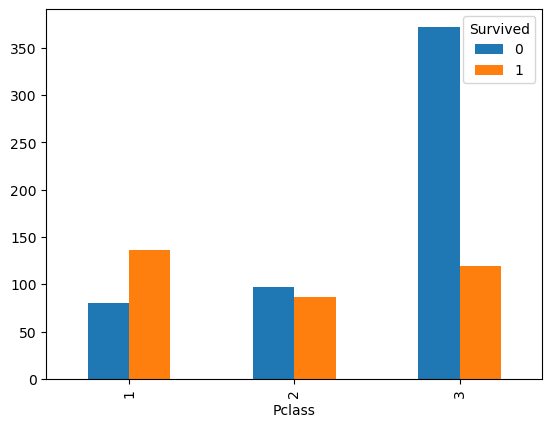

In [18]:
from matplotlib import pyplot as plt
pd.crosstab(df['Pclass'],df['Survived']).plot(kind='bar')